# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [37]:
medical.shape

(1338, 8)

In [38]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

In [39]:
x = medical['charges']

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

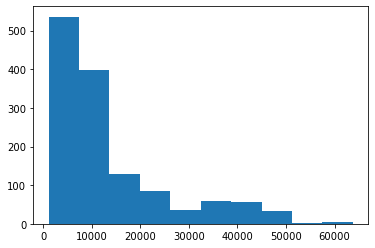

In [40]:
plt.hist(x)

Looking at the histogram, we can see the values are heavily to one side not evenly distributed. The std will be large. The mean and std of the sample won't be appropriate by themselves to give a good understanding of this data. The mean and std of the full population are unknown. 

In [41]:
xbar = x.mean()
xbar

13270.422265141257

In [42]:
s = x.std()
s

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The size of this sample is 1338 which is large and the sample is also random. The most appropriate frequentist test, of the ones discussed so far, would be the t-test. We'll want to determine the confidence interval and because the population std is unknonw, the t distribution will be used as the critical value. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided interval makes sense because the admin does not care about charges being too high; too low of an average charge is the concern. 

In [43]:
n = x.size
dof = n - 1
#for one-sided we will use 95%, not 97.5%: 
prob = .95

In [44]:
#Calculate the critical value
tscore = t(dof).ppf(prob)

In [45]:
#Calculate the confidence interval
SE = s / n**.5
MoE = tscore * SE
confidence_interval = [xbar - MoE, xbar + MoE]
confidence_interval

[12725.48718381623, 13815.357346466282]

The one-sided confidence interval which would actually interest us starts at the sample mean minus the margin of error but ends at infinity. confidence_interval[0] to infinity would be a 97.5% confidence interval though. Let's do another so we end up with only 95% for our one-sided test. 

In [46]:
#Calculate the relevant 95% confidence interval
prob = .95 - ((1-.95)/2)
tscore = t(dof).ppf(prob)
MoE = tscore * SE
confidence_interval = [xbar - MoE, np.inf]
confidence_interval

[12793.56630478045, inf]

The admin's concern is if the population mean < 12000. That value is not within either of our confidence intervals. They should not be concerned.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Our null is that insured people *are* charged differently compared to those without. The admin asked if they "really are" so we are only confirming the status queue if they are charged differently. We are willing to assume they are, until proven otherwise. Therefore, this will be our null. 

The assumption about the variances of the two groups we are making here is that they are the same. This is because it would otherwise be violating the assumption of homogeneity of variances and we would use a different method. 

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [62]:
xs = medical[['insuranceclaim', 'charges']]
xs.head()

,insuranceclaim,charges
0,1,16884.92400
1,1,1725.55230
2,0,4449.46200
3,0,21984.47061
4,1,3866.85520


In [79]:
ns = xs.groupby('insuranceclaim')['charges'].count()
ns

insuranceclaim
0    555
1    783
Name: charges, dtype: int64

In [80]:
stds = xs.groupby('insuranceclaim')['charges'].std()
stds

insuranceclaim
0     6446.510127
1    14045.928419
Name: charges, dtype: float64

In [81]:
xbars = xs.groupby('insuranceclaim')['charges'].mean()
xbars

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64

In [82]:
#use the formula to get pooled deviation
wv = (ns[0]-1) * stds[0]**2 + (ns[1]-1) * stds[1]**2
dof = ns[0] + ns[1] - 2
std_pooled = (wv/dof)**.5
std_pooled

11520.034268775256

In [87]:
#use the formula to get pooled tscore
tstat = (xbars[0]-xbars[1]) / ( std_pooled * (1/ns[0] + 1/ns[1])**.5 )
tstat

-11.89329903087671

In [93]:
#Calculate tvalue the way we did in part A: 
prob = .95
alpha = 1 - prob
#
tvalue = t(dof).ppf(prob)
tvalue

-1.6459949688112576

Since our null is that the population means will not be the same, the distribution of our test statistic under the assumption that it is true should be the two tails, excluding the middle area.

In [109]:
pvalue = 2 * t(dof).cdf(tstat)
pvalue

4.461230231620972e-31

In [111]:
from scipy.stats import ttest_ind
help(ttest_ind)

Help on function ttest_ind in module scipy.stats.stats:

ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
    Calculate the T-test for the means of *two independent* samples of scores.
    
    This is a two-sided test for the null hypothesis that 2 independent samples
    have identical average (expected) values. This test assumes that the
    populations have identical variances by default.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape, except in the dimension
        corresponding to `axis` (the first, by default).
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    equal_var : bool, optional
        If True (default), perform a standard independent 2 sample test
        that assumes equal population variances [1]_.
        If False, perform Welch's t-test, which does not assume equal
        populatio

In [110]:
#Calculate the tstat and value again but this time using scipy

charges_i = xs.charges.loc[xs['insuranceclaim'] == 1]
charges_u = xs.charges.loc[xs['insuranceclaim'] != 1]
ttest_ind(charges_u, charges_i)

Ttest_indResult(statistic=-11.893299030876712, pvalue=4.461230231620717e-31)

The manual method did match the scipy method. 
Because the p is very small, we can reject the alternate hypothesis that the means are the same and we can not reject our null hypothesis that the means are different. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no z-test listed [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)
With a large enough sample size, the t-test should be the same as the z-test anyway. If the sample is not large, then a z-test is no

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test